In [1]:
%cd '/content/drive/MyDrive/Movie Rating Prediction/Movie Reviews Weighted Average'

/content/drive/MyDrive/Movie Rating Prediction/Movie Reviews Weighted Average


In [37]:
import pandas as pd
import numpy as np
import random

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


from matplotlib import pyplot
from sklearn.model_selection import KFold


In [3]:
temp = pd.read_csv('UserReviewWithReviewRating.csv')
temp['Helpful Count'] = temp['Helpful Count'].str.replace(',' , '').astype(int)
temp['Total Count'] = temp['Total Count'].str.replace(',' , '').astype(int)

temp['helpful_fraction'] = temp['Helpful Count'].astype(float) / temp['Total Count'].astype(float)

In [4]:
temp.head()

,movie title,overall review,user_review,user_rating,Helpful Count,Total Count,pred_review_rating,helpful_fraction
0,The Dark Knight,9.0,Totally one of the greatest movie titles ever ...,10,48,51,1.001919,0.941176
1,The Dark Knight,9.0,Best movie ever. Heath ledger's work is phenom...,10,76,83,0.990340,0.915663
2,The Dark Knight,9.0,Confidently directed dark brooding and packed ...,10,431,508,0.846666,0.848425
3,The Dark Knight,9.0,It is just what you want for the best movie. G...,10,193,226,0.920118,0.853982
4,The Dark Knight,9.0,I got to see The Dark Knight on Wednesday nigh...,10,938,1142,0.912978,0.821366


In [5]:
for column in ['user_rating' , 'pred_review_rating' , 'helpful_fraction' , 'Total Count']:
  min_v = temp[column].min()
  max_v = temp[column].max()
  temp[column] = (temp[column] - min_v) / (max_v - min_v) 

In [6]:
temp.head()

,movie title,overall review,user_review,user_rating,Helpful Count,Total Count,pred_review_rating,helpful_fraction
0,The Dark Knight,9.0,Totally one of the greatest movie titles ever ...,1.0,48,0.006993,0.962313,0.911765
1,The Dark Knight,9.0,Best movie ever. Heath ledger's work is phenom...,1.0,76,0.011469,0.951293,0.873494
2,The Dark Knight,9.0,Confidently directed dark brooding and packed ...,1.0,431,0.070909,0.814554,0.772638
3,The Dark Knight,9.0,It is just what you want for the best movie. G...,1.0,193,0.031469,0.884461,0.780973
4,The Dark Knight,9.0,I got to see The Dark Knight on Wednesday nigh...,1.0,938,0.159580,0.877665,0.732049


In [7]:
movie_titles = temp['movie title'].unique()

In [8]:
len(movie_titles)

1210

In [17]:
count = 0
x = pd.DataFrame()
y = []

for movie_title in movie_titles:
  df = temp[temp['movie title'] == movie_title]
  if df.shape[0] >= 20:
    count += 1
    x = x.append(df.loc[: , ['user_rating' , 'pred_review_rating' , 'helpful_fraction' , 'Total Count']][:20])
    y.append(temp[temp['movie title'] == movie_title].iloc[0]['overall review'] )


print(x.shape)
print(len(y))
print(count)

(22860, 4)
1143
1143


In [18]:
movies = x.to_numpy()
y = np.array(y)
movies = movies.reshape((-1,20,4))

In [74]:
movies = movies.astype('float32')
y = y.astype('float32')

movies = movies[2:]
test1 = movies[:10]
test2 = movies[-10:]

y = y[2:]
y_test1 = y[:10]
y_test2 = y[-10:]


movies.shape, y.shape

((1137, 20, 4), (1137,))

In [65]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Flatten(input_shape = (20,4)))
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
NN_model.add(Dropout(0.3))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))

# NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dropout(0.3))

# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 80)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               10368     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________

In [68]:
history = NN_model.fit(movies, y, epochs=1000, batch_size=32, validation_split = 0.2)


Epoch 1/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - val_loss: 0.5969 - val_mean_absolute_error: 0.5969
Epoch 2/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - val_loss: 0.6002 - val_mean_absolute_error: 0.6002
Epoch 3/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - val_loss: 0.5418 - val_mean_absolute_error: 0.5418
Epoch 4/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.4826 - mean_absolute_error: 0.4826 - val_loss: 0.6690 - val_mean_absolute_error: 0.6690
Epoch 5/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - val_loss: 0.5386 - val_mean_absolute_error: 0.5386
Epoch 6/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.4698 - mean_absolute_error: 0.4698 - val_loss: 0.6084 - val_mean_absolute_error: 0.6084
Epoch 7/1000
29/

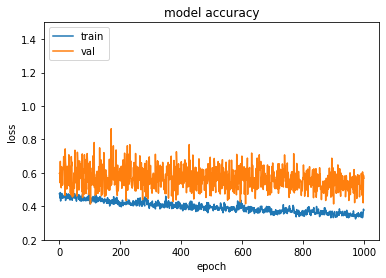

In [70]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

axes = plt.gca()
axes.set_ylim([0.2,1.5])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [75]:
print(NN_model.predict(test1))
y_test1


[[8.25783  ]
 [8.0718975]
 [7.990178 ]
 [7.9320564]
 [7.871461 ]
 [8.671871 ]
 [8.1479   ]
 [8.063181 ]
 [8.082701 ]
 [7.773181 ]]


array([8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4], dtype=float32)

In [76]:
print(NN_model.predict(test2))
y_test2


[[7.7692423]
 [7.6163964]
 [6.097542 ]
 [7.494275 ]
 [5.7585716]
 [7.5993876]
 [7.8139405]
 [7.6224427]
 [6.651799 ]
 [7.187687 ]]


array([7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3], dtype=float32)